<a href="https://colab.research.google.com/github/JanaBog/Galaxies_workshop/blob/main/Analyzing_Galaxies_Star_Formation_and_Morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Analyzing Galaxies: Star Formation and Morphology
**Workshop Leader:** Jana Bogdanoska

**Contact:** janabogdanoska@pmf.ukim.mk

**Institution:** Ss Cyril and Methodius University in Skopje  

**Conference:** AstroEduCon  

**Date:** September 25, 2025

This notebook guides students through an investigation of how galaxy shape relates to star formation, using real astronomical data from the Sloan Digital Sky Survey (SDSS).

## How to Use This Notebook

This page is a special kind of app called a Python Notebook. It’s made up of blocks, called cells, that can contain either text or code. You’ll be using these cells to explore and analyze galaxies.

An input cell looks like a light gray box with something like ` [ ]` on the left.

These cells contain code — instructions telling the computer what to do.

A text cell (like the one you’re reading right now) contains explanations and instructions.

To select a cell, simply click inside it. To make the code in the selected imput cell run, press the ▶️ play button in the upper left corner of the cell or hold down Shift + Enter on your keyboard. When the cell has finished running, the result (called the output) will appear directly underneath — this might be text, a graph, or sometimes nothing at all.

Tip: If a message pops up asking whether it’s safe to run the code, click “Run Anyway.” All code in this notebook has been prepared for teaching and is safe to use.

#### Notes about code and comments

Lines that start with # are comments. They don’t run, but they explain what the code is doing. Always read the comments before running a cell — they’re there to guide you.

Lines without # are the actual instructions the computer follows.

Try it out:

In [1]:
# This is a comment and the text below is code!
print("Congrats! You’ve just run your first piece of code!")

Congrats! You’ve just run your first piece of code!


#### Getting Set Up

Before we dive into the science, we need to load the tools (libraries) that make it possible to work with galaxy data. To do that, select and run the cell below. You can also go at the top menu, and select Runtime → Run all. This makes sure every library is imported and the notebook is ready. Later, you will be able to run each cell individually where needed.

Helpful tips:
- If something looks strange later (like a missing graph), don’t panic — just re-run the cell that gave the error, or re-run everything with Run all.

- Some cells may take a little longer to run, especially those that load SDSS data or create multiple plots. Be patient!

- If you see a warning, you can usually ignore it — we’ve set the notebook to skip over anything not important for this activity.

- Occasionally, the notebook may ask to re-download data or re-plot graphs. This is normal.

In [27]:
# Installing and importing the necessary libraries
!pip install pandas matplotlib seaborn
!pip install -q astroquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astroquery.sdss import SDSS
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
from PIL import Image
from io import BytesIO
from astropy import units as u
import requests
from matplotlib.patches import Rectangle
from IPython.display import HTML, display
import ipywidgets as w
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.simplefilter("ignore", category=AstropyWarning)
warnings.simplefilter("ignore", category=FITSFixedWarning)
import logging
logging.getLogger("astroquery").setLevel(logging.ERROR)
sns.set(style="whitegrid")

NameError: name 'AstropyWarning' is not defined

## Chapter 0: First Impressions

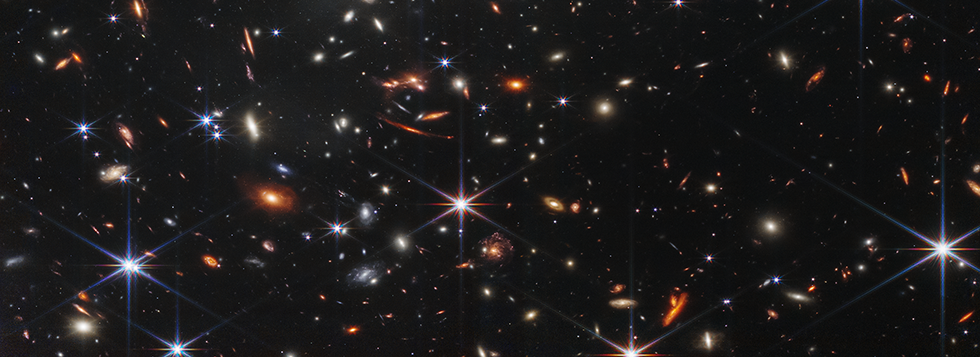

Image: [NASA, ESA, CSA, STScI](https://science.nasa.gov/asset/webb/webbs-first-deep-field-nircam-image/)

### What Do You See?

This is part of the JWST Deep Field — one of the sharpest, deepest looks ever taken into the universe. In this tiny patch of sky, no bigger than a grain of sand held at arm’s length, we see thousands of galaxies stretching across cosmic time, from relatively nearby to some of the very first that ever formed.

Today, we’ll use this breathtaking image as our starting point to explore galaxies: how we can tell them apart, what their shapes and colors reveal, and what these clues can teach us about the life stories of galaxies across the universe.

Note: The bright points with spikes are stars in our own Milky Way, but since our focus is on the countless distant galaxies behind them, we’ll set the stars aside for now — they’re just foreground objects blocking part of the view.

1. What different shapes and patterns do you notice among these galaxies?
2. How might we group or classify them? What categories come to mind?
3. Why do some galaxies look redder or bluer than others?
4. Which galaxies do you think are older or younger, and why?
5. If you were an astronomer, what extra information would you want (beyond an image) to better understand these galaxies?



### Learning Objectives

By the end of this module, you will be able to:

- Recognize and describe different galaxy shapes and explain what they can tell us about galaxy history.

- Use simple color measurements from real data (such as the SDSS u–r color index) to identify whether galaxies are actively forming stars or are more quiescent.

- Work with astronomical data in Python to make basic visualizations and practice how scientists explore large datasets.

- Interpret common plots in astronomy — like color–magnitude and color–color diagrams — and connect their features to physical properties of galaxies.

## Chapter 1: Meeting the Data – The Sloan Digital Sky Survey (SDSS)

The Sloan Digital Sky Survey (SDSS) is a huge project that has mapped a large part of the night sky with a special telescope in New Mexico, USA. Astronomers use it because it provides both pictures and measurements of millions of galaxies, stars, and quasars.

For each galaxy, SDSS tells us:

- how bright it looks in different colors (filters),

- how far away it is (redshift),

- and what its shape is (spiral or elliptical).

This makes SDSS one of the most important tools for studying how galaxies form and change. In our activity, we’ll use a small sample of SDSS data to explore how galaxy color and shape are connected to star formation.

For more resources and activities connected to SDSS, visit their [voyages page](https://voyages.sdss.org/).




<figure>
  <img src="https://www.sdss4.org/wp-content/uploads/2014/06/orangepie.jpg"
       alt="SDSS Galaxy Map — a slice of the Universe showing large-scale structure of galaxies"
       width="500">
  <figcaption>
    SDSS Galaxy Map — a slice of the Universe.  Each dot is a galaxy; the color is the g-r color of that galaxy.
    <br><em>Image Credit: M. Blanton & SDSS</em>
  </figcaption>
</figure>


### SDSS Filters and Imaging 📷
When SDSS looks at galaxies, it doesn’t just take one picture — it takes five, each through a different filter that lets in only certain colors of light.

* u → ultraviolet (invisible to our eyes)
* g → green
* r → red
* i and z → infrared (beyond what our eyes can see)

When we combine these filters, we get colorful images of galaxies. The numbers we’ll use in this activity come from comparing brightness in the u and r filters. This difference, called u–r color, will help us see how galaxies can be grouped.


We will download a sample of SDSS galaxy data, which includes:
- Galaxy ID (name)
- Morphology (spiral/elliptical)
- Redshift (distance)
- Brightness in different filters
- Galaxy radius

<figure> <img src="https://www.sdss4.org/wp-content/uploads/2014/11/faceplat2.jpg" alt="An illustration of SDSS camera and filters." width="300"> <figcaption> An illustration of SDSS camera and filters </figcaption> </figure>

Do not be afraid of the code in this notebook! Usually you just need to run it and look at the output.

Here, it fetches a small sample of galaxy data from SDSS and prepares it for use. It builds a query, downloads a table, adds simple color columns (like u–r), does light cleanup, and computes a basic “shape” proxy so we can group galaxies in simple ways.

We could have imported a ready-made CSV file instead; doing it this way keeps the door open to adjust the selection later (for example, changing the redshift range, brightness limits, or number of objects) without rebuilding the whole activity.

In [3]:
# ------------------------------------------------------------
# ------------------ QUERY FOR SDSS DATA ---------------------
# ------------------------------------------------------------

# SQL query: we ask SDSS for up to 2000 galaxies with certain properties.
# We select positions, magnitudes (u, g, r), radii, shape parameters, and redshift.
# Lines starting with -- are comments inside SQL, explaining each column/condition.

query = '''
SELECT TOP 2000
  p.objid,                       -- unique object ID in SDSS
  p.ra, p.dec,                   -- sky coordinates (right ascension & declination)
  p.u, p.g, p.r,                 -- magnitudes (brightness) in u, g, r filters
  p.petroR50_r, p.petroR90_r,    -- radii containing 50% and 90% of the light (for concentration)
  p.fracDeV_r,                   -- optional: bulge fraction (0..1), not needed here
  p.deVAB_r, p.expAB_r,          -- optional: axis ratios (shape/flattening)
  s.z AS redshift                -- redshift (distance measure)
FROM PhotoObj AS p
JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE s.class = 'GALAXY'         -- keep only objects confirmed as galaxies
  AND s.z BETWEEN 0.01 AND 0.2   -- only galaxies in this redshift (distance) range
  AND p.r BETWEEN 14 AND 17      -- only galaxies within this brightness range in r-band
  AND p.type = 3                 -- optional: make sure it's classified as a galaxy in photometry
ORDER BY p.objid                 -- order results by object ID
'''

# Run the query on SDSS (here: Data Release 19)
galaxies = SDSS.query_sql(query, data_release=19)

# Safety check: if the query returns nothing, stop with an error
if galaxies is None:
    raise RuntimeError("Query returned no results.")

# Convert the result to a pandas DataFrame for easier handling
df = galaxies.to_pandas()

# ------------------------------------------------------------
# ------------------ ADD COLOR INDICES ------------------------
# ------------------------------------------------------------

# Color indices are just differences between magnitudes in two filters.
# These will let us compare galaxies by their colors.
df["u_r"] = df["u"] - df["r"]   # difference between u and r magnitudes
df["u_g"] = df["u"] - df["g"]   # difference between u and g
df["g_r"] = df["g"] - df["r"]   # difference between g and r

# ------------------------------------------------------------
# ------------------ CLEAN UP THE DATA ------------------------
# ------------------------------------------------------------

# Remove galaxies with impossible or extreme color values
df = df[(df["u_r"] > -1) & (df["u_r"] < 5)]
df = df[(df["u_g"] > 0) & (df["u_g"] < 3.5)]

# Drop galaxies that are missing Petrosian radii (needed for concentration index)
df = df.dropna(subset=["petroR50_r", "petroR90_r"])

# Keep only galaxies with positive radii (avoid bad measurements)
df = df[(df["petroR50_r"] > 0) & (df["petroR90_r"] > 0)]

# ------------------------------------------------------------
# -------------- CONCENTRATION INDEX & MORPHOLOGY -------------
# ------------------------------------------------------------

# Calculate concentration index: ratio of R90 to R50.
# Larger values mean light is more centrally concentrated.
df["C_r"] = df["petroR90_r"] / df["petroR50_r"]

# Use a simple rule: C_r >= 2.6 → elliptical, else spiral.
# This is a *rough* classifier just for classroom use.
df["morphology"] = df["C_r"].apply(lambda c: "elliptical" if c >= 2.6 else "spiral")

# Calculate a second morphology guess based only on u–r color.
# We don’t use it as the main classifier, but it’s kept for comparison.
df["morph_colorcut"] = df["u_r"].apply(lambda x: "spiral" if x < 2.2 else "elliptical")

# ------------------------------------------------------------
# ----------- BALANCE SAMPLE FOR CLASSROOM COMPARISON ---------
# ------------------------------------------------------------

# To keep spirals and ellipticals equally represented, we randomly
# sample up to 200 galaxies from each group. This makes side-by-side
# plots easier to compare.
n = min(len(df[df["morphology"] == "spiral"]),
        len(df[df["morphology"] == "elliptical"]), 200)

spirals = df[df["morphology"] == "spiral"].sample(n, random_state=42)
ellips = df[df["morphology"] == "elliptical"].sample(n, random_state=42)

# Combine into one balanced DataFrame
df = pd.concat([spirals, ellips]).reset_index(drop=True)

# Show the first few rows so students can see what the table looks like
df.head()

,objid,ra,dec,u,g,r,petroR50_r,petroR90_r,fracDeV_r,deVAB_r,expAB_r,redshift,u_r,u_g,g_r,C_r,morphology,morph_colorcut
0,1237648702986191206,228.515581,-1.211932,19.31755,17.64284,16.75572,2.058875,5.244336,0.299265,0.366536,0.406474,0.050913,2.56183,1.67471,0.88712,2.547185,spiral,elliptical
1,1237648703516246346,212.953924,-0.706862,19.02558,17.73924,16.95303,3.253757,6.615323,0.053972,0.731987,0.746614,0.117556,2.07255,1.28634,0.78621,2.033134,spiral,spiral
2,1237648702981800099,218.392923,-1.121867,18.57212,17.36280,16.76653,3.252371,6.967002,0.000000,0.934189,0.923734,0.080911,1.80559,1.20932,0.59627,2.142130,spiral,spiral
3,1237648704577929251,185.379362,0.086912,18.13147,17.35320,16.93616,1.606097,4.082895,0.912594,0.788455,0.795256,0.107223,1.19531,0.77827,0.41704,2.542122,spiral,spiral
4,1237648704579895311,189.753226,0.124837,18.83398,17.60006,16.87173,2.158652,5.397892,0.499634,0.460449,0.501575,0.072009,1.96225,1.23392,0.72833,2.500585,spiral,spiral


## Chapter 2: Galaxy Morphology – The Shapes of the Universe

Galaxies are vast systems of stars, gas, dust, and dark matter. Galaxy **morphology** means the shape and structure of a galaxy. Astronomers classify galaxies into three main types:


* Spiral galaxies: Flat, rotating disks with spiral arms

* Elliptical galaxies: Rounder, smoother systems

* Irregular galaxies: Chaotic in shape

These shapes are more than appearances: they tell us about a galaxy’s history, how stars formed inside it, and how it may have interacted or merged with others. This way of sorting galaxies goes back to Edwin Hubble, who suggested the famous “tuning fork” diagram:

<figure> <img src="https://assets.science.nasa.gov/dynamicimage/assets/science/missions/hubble/releases/1999/10/STScI-01EVVPETV40FFV593Y8GKN83WH.jpg?w=850&h=700&fit=crop&crop=faces%2Cfocalpoint" alt="Edwin Hubble's Classification of Galaxies, known as the tuning fork diagram" width="800"> <figcaption>The “Tuning Fork” diagram: a classic way of organizing galaxy shapes. </figcaption> </figure>

 The shapes aren’t just for looks — they reflect what’s happening inside the galaxy. As we work through the data, we’ll uncover how their stars, colors, and histories connect to these shapes. In the chapters below, we’ll see how we can use data — not just pictures — to explore these galaxy types in detail.

### Activity 1: Galaxy Gallery — By-eye vs. Auto

**Goal:** Compare your *by-eye* shape calls with the notebook’s simple auto label.

**Work in pairs/triads.**

**What to do:**
1) **Run Cell 1 of 3** to see the **12 numbered galaxy images**.  
2) **Run Cell 2 of 3** and, for each number **#1–#12**, choose **S** (spiral) or **E** (elliptical) from the dropdowns, then click **Save answers**.  
3) **Run Cell 3 of 3** to **reveal the notebook’s automatic label** and see any **mismatched (tricky) cases** as images.  
4) If a case was tricky (edge-on disk, very small/faint, noisy), **note the number** and your guess why.

**Deliverable:**  
- “We matched **X/12**.”  
- “Tricky case: **#__** (looked ___ but auto said ___).”

> **If dropdowns don’t appear:** type your choices into the `student_guess` list in Cell 2 (12 entries, each “S” or “E”) and re-run Cell 2, then Cell 3.


In [34]:
# ------------------------------------------------------------
# Activity 1 — Galaxy Gallery (Cell 1 of 3)
# ------------------------------------------------------------

if "df" not in globals():
    raise RuntimeError("DataFrame 'df' not found. Run the SDSS query/prep cell first.")

N_GALLERY   = 12
RANDOM_SEED = 20

# Sample and keep only what's needed (no labels to avoid spoilers)
_gallery = df.sample(min(N_GALLERY, len(df)), random_state=RANDOM_SEED).copy()
gallery = _gallery.loc[:, ["objid", "ra", "dec"]].reset_index(drop=True)
gallery.insert(0, "#", range(1, len(gallery) + 1))

def sdss_img(ra, dec, scale=0.2, width=256, height=256):
    return (
        "https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg"
        f"?ra={ra}&dec={dec}&scale={scale}&width={width}&height={height}"
    )

gallery["image_url"] = [sdss_img(r, d) for r, d in zip(gallery["ra"], gallery["dec"])]

# Render images in a simple grid with numbers
cards = []
for _, row in gallery.iterrows():
    num, obj, url = int(row["#"]), int(row["objid"]), row["image_url"]
    cards.append(
        f"""
        <figure style="margin:6px;text-align:center;">
          <img src="{url}" alt="SDSS cutout #{num} (objid {obj})"
               style="width:190px;height:190px;object-fit:cover;border-radius:8px;border:1px solid #ddd;">
          <figcaption style="font-size:12px;color:#333;">
            <b>#{num}</b> &nbsp;objid: {obj}
          </figcaption>
        </figure>
        """
    )

display(HTML(f"""
<div style="display:grid;grid-template-columns:repeat(4, minmax(0, 1fr));gap:8px;">
  {''.join(cards)}
</div>
<p style="font-size:16px;color:#444;margin-top:6px;">
  Decide whether each galaxy looks like a <b>Spiral (S)</b> or an <b>Elliptical (E)</b>. Run the cell below and input your answers in the dropdown menu.
</p>
"""))


In [7]:
# ------------------------------------------------------------
# Activity 1 — Galaxy Gallery (Cell 2 of 3)
# Pick S/E from dropdowns for each galaxy; click "Save answers".
# ------------------------------------------------------------
if "gallery" not in globals():
    raise RuntimeError("Run Cell 1 first.")

rows = []
pickers = []
for i in range(len(gallery)):
    dd = w.Dropdown(options=["", "S", "E"], value="", description=f"#{i+1}", layout=w.Layout(width="160px"))
    pickers.append(dd)
    rows.append(w.HBox([dd]))

save_btn = w.Button(description="Save answers", button_style="success")
out = w.Output()

def on_save(_):
    guesses = [p.value for p in pickers]
    with out:
        out.clear_output()
        if "" in guesses:
            display(HTML("""
            <div style="background:#ffebee; border-left:8px solid #d32f2f; padding:10px;">
              ⛔ Please choose S/E for every item before saving.
            </div>"""))
            return
        # Save to the expected variable name used by Cell 3
        global student_guess
        student_guess = guesses
        display(HTML("""
        <div style="background:#e8f5e9; border-left:8px solid #2e7d32; padding:10px;">
          ✅ Answers saved. Run <b>Cell 3</b> to reveal & compare.
        </div>"""))

save_btn.on_click(on_save)

display(HTML("<h4>📝 Choose S or E for each galaxy</h4>"))
display(w.VBox(rows))
display(save_btn, out)


Button(button_style='success', description='Save answers', style=ButtonStyle())

Output()

In [8]:
# ------------------------------------------------------------
# Activity 1 — Galaxy Gallery (Cell 3 of 3)
# ------------------------------------------------------------

from IPython.display import HTML, display

for var in ["gallery", "df", "student_guess"]:
    if var not in globals():
        raise RuntimeError(f"Missing '{var}'. Run Cells 1 and 2 first.")

if len(student_guess) != len(gallery):
    raise ValueError("Length of 'student_guess' must match the gallery length.")

# Map S/E to same words as auto labels
map_SE = {"S": "spiral", "E": "elliptical", "s": "spiral", "e": "elliptical", "": None}
student_labels = [map_SE.get(x, None) for x in student_guess]

# Auto labels for the same objids
auto_map = df.drop_duplicates("objid").set_index("objid")["morphology"].to_dict()
auto_labels = [auto_map.get(int(obj), None) for obj in gallery["objid"]]

# Compute mismatches
mismatch_idx = [i for i, (a, b) in enumerate(zip(student_labels, auto_labels)) if a != b]
matches = len(student_labels) - len(mismatch_idx)
total   = len(student_labels)
acc     = 100.0 * matches / total if total else 0.0

print(f"✅ Matches: {matches}/{total}  |  Accuracy: {acc:.1f}%")
print("These are the galaxies that were mismatched:")

if not mismatch_idx:
    display(HTML("<p style='margin-top:6px;font-size:14px;'>🎉 All matched — great job!</p>"))
else:
    # Build cards just for mismatches
    cards = []
    for i in mismatch_idx:
        num   = int(gallery.loc[i, "#"])
        obj   = int(gallery.loc[i, "objid"])
        url   = gallery.loc[i, "image_url"]
        you   = student_labels[i] if student_labels[i] else "—"
        auto  = auto_labels[i] if auto_labels[i] else "—"
        cap   = f"#{num} objid {obj} — You: {you} vs Auto: {auto}"
        cards.append(
            f"""
            <figure style="margin:6px;text-align:center;">
              <img src="{url}" alt="Mismatch #{num} (objid {obj})"
                   style="width:190px;height:190px;object-fit:cover;border-radius:8px;border:1px solid #ddd;">
              <figcaption style="font-size:12px;color:#333;">{cap}</figcaption>
            </figure>
            """
        )

    display(HTML(f"""
    <div style="display:grid;grid-template-columns:repeat(3, minmax(0, 1fr));gap:8px;margin-top:6px;">
      {''.join(cards)}
    </div>
    """))


✅ Matches: 6/12  |  Accuracy: 50.0%
These are the galaxies that were mismatched:


### Discussion and Conclusions

Think about the galaxies you inspected.

1. What patterns distinguish the galaxies you found easy to label from those you found difficult? Be specific about what you saw.
2. Which visual cues did you rely on most? Rank your top three and explain why.
3. After reviewing the mismatches, how much do you trust the automatic label (1–5)? What evidence would raise or lower that score?
4. Did any images resist a simple spiral/elliptical label? If so, propose a third label or an “unsure” policy and when to use it.
5. List two things that could make the features hard to see. How could you tell which one is at play using only the image?

## Chapter 3: How the "Auto" classification is done: Concentration Index

You’ve seen that our eyes don’t always agree on galaxy shapes, and sometimes even disagree with the automatic label. So how does the computer decide? Instead of looking for spiral arms or smoothness, it uses a very simple measurement of how the galaxy’s light is spread out. It does this by finding two radii in the image:

* R50: the distance from the center that encloses half of the galaxy’s measured light.

* R90: the distance that encloses almost all (about 90%) of the light.

If most of the light sits near the center, R50 will be much smaller than R90 (high concentration). If light is spread out, R50 and R90 aren’t so different (low concentration). In SDSS we use the simple concentration index:

$C_r = \frac{R90}{R50}$

We separate the galaxy shapes by one easy rule:

* if $𝐶_𝑟 \ge 2.6$ we call the galaxy elliptical-like (more centrally packed);
* if $C_r \lt 2.6$ we call it spiral-like (more spread out).

It’s not perfect — small, faint, or edge-on galaxies can still be tricky — but it is consistent and reproducible, which is the point of an automatic method.

### Why do spiral-like galaxies look more “spread out”?

Spiral galaxies are built like **flat disks** with **arms that extend far from the center**. Much of their light comes from stars and bright regions scattered **across the disk and along the arms**, not just the core. Because a lot of light lives in the outskirts, the radius that contains half the light (**R50**) ends up **fairly large**, and the radius for 90% (**R90**) isn’t *that* much bigger. The ratio **R90/R50** is therefore **smaller** → **lower concentration**.

Elliptical galaxies are more **rounded and centrally packed**. Their light rises steeply toward the center and fades smoothly outward, so **R50** is **small** (you’ve already captured half the light near the core), while **R90** is **much larger**. That makes **R90/R50** **bigger** → **higher concentration**.

> In short: **disk + extended arms → spread-out light → lower concentration (spiral-like)**;  
> **compact, round profile → centrally packed light → higher concentration (elliptical-like)**.

On the next images you’ll see two galaxies, an elliptical and a spiral, with their R50 (cyan, full line) and R90 (magenta, dashed line) circles drawn. Notice how the light profile changes depending on the galaxy type.


| ![Elliptical](https://github.com/JanaBog/Galaxies_workshop/blob/main/Images/elliptical_R50_R90.png?raw=true) | ![Spiral](https://github.com/JanaBog/Galaxies_workshop/blob/main/Images/spiral_R50_R90.png?raw=true) |
|:---:|:---:|
| Elliptical galaxy with R50 and R90 | Spiral galaxy with R50 and R90 |


### Activity 2: Concentration Ladder — Order from Most to Least

Goal: Look at 6 real SDSS galaxy images. Rank them from most centrally packed to most spread out (by eye).

Then we’ll reveal the actual concentration index $C_r$ and the auto label.

In [16]:
# ------------------------------------------------------------
# Concentration Ladder — Cell 1 of 3
# ------------------------------------------------------------

from IPython.display import HTML, display
import pandas as pd

if "df" not in globals():
    raise RuntimeError("DataFrame 'df' not found. Run the SDSS query/prep cell first.")

N_LADDER   = 6
RANDOM_SEED = 10

# Sample a set; keep only what's needed now
_ladder = df.sample(min(N_LADDER, len(df)), random_state=RANDOM_SEED).copy()
ladder = _ladder.loc[:, ["objid", "ra", "dec"]].reset_index(drop=True)
ladder.insert(0, "#", range(1, len(ladder) + 1))   # classroom numbering

def sdss_img(ra, dec, scale=0.2, width=256, height=256):
    return (
        "https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg"
        f"?ra={ra}&dec={dec}&scale={scale}&width={width}&height={height}"
    )

ladder["image_url"] = [sdss_img(r, d) for r, d in zip(ladder["ra"], ladder["dec"])]

# Show a simple grid with numbers and objids (no labels/stats)
cards = []
for _, row in ladder.iterrows():
    num, obj, url = int(row["#"]), int(row["objid"]), row["image_url"]
    cards.append(
        f"""
        <figure style="margin:6px;text-align:center;">
          <img src="{url}" alt="SDSS cutout #{num} (objid {obj})"
               style="width:190px;height:190px;object-fit:cover;border-radius:8px;border:1px solid #ddd;">
          <figcaption style="font-size:12px;color:#333;">
            <b>#{num}</b> &nbsp;objid: {obj}
          </figcaption>
        </figure>
        """
    )

display(HTML(f"""
<div style="display:grid;grid-template-columns:repeat(3, minmax(0, 1fr));gap:8px;">
  {''.join(cards)}
</div>
<p style="font-size:15px;color:#444;margin-top:8px;">
  📝 <b>By eye:</b> Rank these from <b>most centrally packed</b> to <b>most spread out</b>.
  Use the <b># numbers</b> (e.g., <code>[3, 5, 2, 1, 6, 4]</code>).
</p>
"""))


In [17]:
# ------------------------------------------------------------
# Concentration Ladder — Cell 2 of 3
# ------------------------------------------------------------
import ipywidgets as w
from IPython.display import display, HTML

if "ladder" not in globals():
    raise RuntimeError("Run Cell 1 first.")

# Start with the current order shown in Cell 1
order = list(ladder["#"].tolist())

def render_rows():
    rows = []
    for idx, num in enumerate(order):
        row = ladder.loc[ladder["#"] == num].iloc[0]
        thumb = f'<img src="{row["image_url"]}" style="width:90px;height:90px;object-fit:cover;border-radius:6px;border:1px solid #ddd;">'
        label = f'<div style="min-width:140px;"><b>#{num}</b> &nbsp;objid {int(row["objid"])}</div>'

        up_btn = w.Button(description="↑", layout=w.Layout(width="36px"))
        down_btn = w.Button(description="↓", layout=w.Layout(width="36px"))

        def on_up(_b, i=idx):
            if i > 0:
                order[i-1], order[i] = order[i], order[i-1]
                container.children = render_rows()

        def on_down(_b, i=idx):
            if i < len(order) - 1:
                order[i+1], order[i] = order[i], order[i+1]
                container.children = render_rows()

        up_btn.on_click(on_up)
        down_btn.on_click(on_down)

        rows.append(w.HBox([w.HTML(thumb), w.HTML(label), up_btn, down_btn]))
    return tuple(rows)

container = w.VBox(render_rows())
save_btn = w.Button(description="Save order", button_style="success")
out = w.Output()

def on_save(_b):
    global ladder_order_student
    ladder_order_student = order.copy()  # what Cell 3 expects
    with out:
        out.clear_output()
        display(HTML("""
        <div style="background:#e8f5e9; border-left:8px solid #2e7d32; padding:10px; font-size:14px;">
          ✅ Order saved. Run <b>Cell 3</b> to reveal the true concentration order.
        </div>"""))

save_btn.on_click(on_save)

display(HTML("<h4>📝 Arrange from <b>most</b> → <b>least</b> concentrated, then click <b>Save order</b></h4>"))
display(container, save_btn, out)


Button(button_style='success', description='Save order', style=ButtonStyle())

Output()

In [18]:
# ------------------------------------------------------------
# Concentration Ladder — Cell 3 of 3
# ------------------------------------------------------------

from IPython.display import HTML, display

for var in ["ladder", "df", "ladder_order_student"]:
    if var not in globals():
        raise RuntimeError(f"Missing '{var}'. Run Cells 1–2 first.")

# Ensure C_r exists
if "C_r" not in df.columns:
    if not {"petroR90_r", "petroR50_r"}.issubset(df.columns):
        raise RuntimeError("Missing R90/R50 columns in df.")
    df["C_r"] = df["petroR90_r"] / df["petroR50_r"]

# Attach C_r and auto label for the ladder set
truth = ladder.merge(df[["objid","C_r","morphology"]].drop_duplicates(), on="objid", how="left")

# True order: most → least concentrated
truth_sorted = truth.sort_values("C_r", ascending=False).reset_index(drop=True)
true_order_numbers = truth_sorted["#"].tolist()

# Compare to student order
if sorted(true_order_numbers) != sorted(ladder_order_student):
    raise ValueError("Student order invalid. Re-run Cell 2 and fix the list.")

pos_true = {num:i+1 for i,num in enumerate(true_order_numbers)}
pos_stud = {num:i+1 for i,num in enumerate(ladder_order_student)}

# Simple score: positions that match exactly
exact_matches = sum(pos_true[n] == pos_stud[n] for n in true_order_numbers)

print(f"Exact position matches: {exact_matches}/{len(true_order_numbers)}")

# Build reveal grid in true order, with student's position vs true position
cards = []
for i, row in truth_sorted.iterrows():
    num   = int(row["#"])
    obj   = int(row["objid"])
    url   = row["image_url"]
    cr    = row["C_r"]
    auto  = row.get("morphology", "—")
    tpos  = pos_true[num]
    spos  = pos_stud[num]
    delta = spos - tpos
    note  = "" if delta == 0 else f" (you ranked #{spos}, diff {delta:+d})"
    cap   = f"True #{tpos}: <b>#{num}</b> objid {obj} — C\u209B={cr:.2f}, auto: {auto}{note}"
    cards.append(
        f"""
        <figure style="margin:6px;text-align:center;">
          <img src="{url}" alt="True order #{tpos} — #{num} (objid {obj})"
               style="width:190px;height:190px;object-fit:cover;border-radius:8px;border:1px solid #ddd;">
          <figcaption style="font-size:12px;color:#333;">{cap}</figcaption>
        </figure>
        """
    )

display(HTML(f"""
<h4>Reveal: True order by concentration (most → least)</h4>
<div style="display:grid;grid-template-columns:repeat(4, minmax(0, 1fr));gap:8px;">
  {''.join(cards)}
</div>
<p style="font-size:14px;margin-top:8px;">
  💬 Reflection: Which ones surprised you? Think about size, faintness, edge-on views, or dust lanes.
</p>
"""))


Exact position matches: 0/6


## Chapter 4: Galaxy Colors and Stellar Populations

We just used the concentration index to sort galaxies by *shape*. That’s one powerful clue — but didn't always tell the whole story. It's no accident that SDSS didn’t take just one picture of each galaxy, but **five**: through the u, g, r, i, z filters.

Astronomy images don’t record “true color” — they only measure intensity (how much light arrives) in each filter. That’s why the single-filter images look black and white. To make the colorful pictures we’re used to seeing, astronomers combine several filters into one color composite.

Here is what a spiral and elliptical galaxies look like observerved in each filter:

<figure> <img src="https://github.com/JanaBog/Galaxies_workshop/blob/main/Images/spiral_filters.png?raw=true" width="600"> <figcaption> Spiral galaxy in all 5 SDSS filters.  </figcaption> </figure>

<figure> <img src="https://github.com/JanaBog/Galaxies_workshop/blob/main/Images/elliptical_filters.png?raw=true" width="600"> <figcaption> Elliptical galaxy in all 5 SDSS filters.  </figcaption> </figure>

Think back to the first JWST deep field image you saw — all those galaxies in different colors? A galaxy’s color carries real information, because it mostly comes from its stars:

* Hot, short-lived stars tend to look **bluer**
* Cooler, longer-lived stars look **redder**

Why is this the case? Massive stars have higher  temperatures, so they appear bluer. However, the higher the mass of the star, the shorter the lifetime.



<figure> <img src="https://github.com/JanaBog/Galaxies_workshop/blob/main/Images/Stellar%20Lifespan-2.png?raw=true" width="600"> <figcaption> Size of different stellar classes, with their colors and lifespans in years.  </figcaption> </figure>


In the image above you see the classic sequence **O B A F G K M**:

- At the **top** (O, B): stars are **big, very hot, and blue**, but their **lifetimes are short** (millions to ~100 million years). Their bars are **short** to show this.
- Toward the **bottom** (K, M): stars are **smaller, cooler, and red**, with **very long lifetimes** (tens of billions to trillions of years). Their bars are **long**.

**Key idea:** if a galaxy looks **blue**, it must have **recently formed** hot O/B stars (they don’t live long). If it looks **red**, its light is dominated by older, cooler stars (G/K/M types).

So the color of the galaxy comes from the stars that dominate in number right now — a peek into its **stellar story**.

Let’s use SDSS’s multi-color view to see what color can tell us.

But, there’s a twist: **dust** in galaxies scatters and absorbs light—especially blue/UV—so dust can make a galaxy **appear redder and dimmer** than it truly is (edge-on spirals are a common example). Color is powerful, but we have to keep dust in mind.

### Color index (u–r)

To talk about “bluer” and “redder” in a consistent way, we use a **color index**—a comparison of brightness in two filters. Here we use **u** (ultraviolet) and **r** (red):

> $u–r$ = (brightness in $u$) − (brightness in $r$)

- Smaller $u–r$ → relatively brighter in $u$ → **bluer** overall.  
- Larger $u–r$ → relatively brighter in $r$ → **redder** overall.

A simple rule of thumb:

- $u–r < 2.2$ → spiral-like (bluer)  
- $u–r ≥ 2.2$ → elliptical-like (redder)

This a guide, not a law (don't forget about the effects of dust). But as a first pass, u–r is a clear, reproducible way to determine the galaxy type based on its stellar content.


### Does color line up with our shape label?

So far, we labeled each galaxy’s morphology with a simple, automatic rule from the concentration index. Now let’s check whether **color** tells a consistent story.

Below is a histogram of the $u–r$ color index for our sample, split by the morphology tag.  
A histogram is a plot that shows **how many galaxies** fall in each u–r value range. The smooth line traces the overall trend.  

Now, run the plot and see what the data say.](https://)

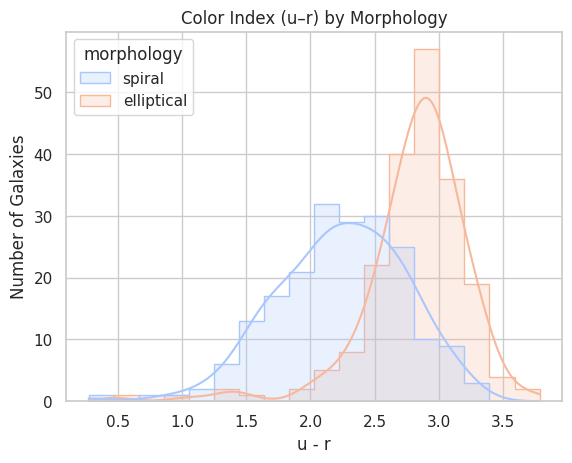

In [19]:
# Plot color index distribution
sns.histplot(data=df, x="u_r", hue="morphology", element="step", kde=True, palette="coolwarm")
plt.title("Color Index (u–r) by Morphology")
plt.xlabel("u - r")
plt.ylabel("Number of Galaxies")
plt.show()

### Discussion: What can we conclude?

- Does color mostly agree with our shape label?
- Do the two curves **peak** at different $u-r$ values, or mostly sit on top of each other?
-  If you had to pick one cutoff, where would you place it—and **why**? Is the rule of thumb at $u-r=2.2$ the best choice for this sample?
- In which $u-r$ range do the two groups **mix the most**? What does that say about confidence in labels there?
- Can you spot bins where spiral-like galaxies appear at very red $u-r$ or elliptical-like appear at very blue $u-r$? What might explain those cases?
- For which $u-r$ ranges would you feel most confident in the label, and least confident? What visual evidence from the plot supports that?
- What extra clue could a second color (e.g., \(u-g\) or \(g-r\)) add to separate the groups?



### Another way to check agreement: a simple confusion table

The histogram gives a **visual** check. Now let’s do a **numerical** check.  
We’ll make a small **2×2 confusion table** that compares the two labels:

- **Rows:** the **concentration** label (`morphology`)  
- **Columns:** the **color-cut** label (`morph_colorcut`)

Read the **diagonal** cells as “agreements” and the **off-diagonals** as “disagreements.”  
After the counts, we’ll also look at **percentages** and an **overall agreement** score to see how closely the two methods line up.

Finally, the last cell will show us some of the galaxies where the two methods disagree, to see if we can better understand why.

In [ ]:
# Compare concentration vs color-cut labels in a simple table
# Rows = concentration label; Columns = color-cut label
confusion = pd.crosstab(df["morphology"], df["morph_colorcut"]).reindex(
    index=["spiral", "elliptical"], columns=["spiral", "elliptical"], fill_value=0
)
print("Confusion table:\n")
display(confusion)

# Row-wise percentages (how often each concentration label agrees with color-cut)
confusion_pct = (confusion.div(confusion.sum(axis=1), axis=0) * 100).round(1)

overall_agreement = (df["morphology"] == df["morph_colorcut"]).mean() * 100

print("\n \n Row-wise percentages (by concentration label):\n")
display(confusion_pct)

print(f"\nOverall agreement: {overall_agreement:.1f}%")

In [ ]:
# ------------------------------------------------------------
# Show disagreements AS IMAGES (color-cut vs concentration)
# ------------------------------------------------------------
from IPython.display import HTML, display

# Find galaxies where the two labels disagree
mask = df["morphology"] != df["morph_colorcut"]
n_show = int(mask.sum())

if n_show == 0:
    print("🎉 No disagreements found in this sample.")
else:
    # Limit to a handful so it's readable
    n_pick = min(6, n_show)
    sample = df.loc[mask, ["objid", "ra", "dec", "u_r", "C_r", "morphology", "morph_colorcut"]] \
               .sample(n_pick, random_state=1) \
               .reset_index(drop=True)

    # SDSS cutout helper (DR16)
    def sdss_img(ra, dec, scale=0.2, width=256, height=256):
        return (
            "https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg"
            f"?ra={ra}&dec={dec}&scale={scale}&width={width}&height={height}"
        )

    # Build cards
    cards = []
    for _, row in sample.iterrows():
        url  = sdss_img(row["ra"], row["dec"])
        obj  = int(row["objid"])
        ur   = f"{row['u_r']:.2f}"
        cr   = f"{row['C_r']:.2f}"
        conc = row["morphology"]           # from concentration
        colr = row["morph_colorcut"]       # from u–r color cut

        caption = (
            f"objid {obj} — u−r={ur}, C_r={cr}<br>"
            f"<b>Concentration:</b> {conc} &nbsp;|&nbsp; <b>Color-cut:</b> {colr}"
        )

        cards.append(
            f"""
            <figure style="margin:6px;text-align:center;">
              <img src="{url}" alt="SDSS cutout objid {obj}"
                   style="width:190px;height:190px;object-fit:cover;border-radius:8px;border:1px solid #ddd;">
              <figcaption style="font-size:12px;color:#333;">{caption}</figcaption>
            </figure>
            """
        )

    # Render grid
    html = f"""
    <h4>Disagreements (showing {n_pick} of {n_show})</h4>
    <div style="display:grid;grid-template-columns:repeat(3, minmax(0, 1fr));gap:8px;">
      {''.join(cards)}
    </div>
    <p style="font-size:13px;color:#444;margin-top:8px;">
      💬 What could explain each mismatch? Consider dust, edge-on views, or small/faint images.
    </p>
    """
    display(HTML(html))

## Chapter 5: Using Two Colors on a Color–Color Diagram

A single color (like **u–r**) is a 1-number summary. Useful, but it can **mix causes** (age, dust, distance effects).  
A **color–color** diagram uses **two colors at once**. That 2-D view gives us room to separate patterns.

Here we will plot a $g-r$ vs $u-g$ diagram. How to read the plot:
- Each dot = one galaxy
- Blue dot = classified as spiral, orange = elliptical by the concentration index method.  
- x-axis: \(g-r\) (redness).  y-axis: \(u-g\) (UV-to-blue).  
- **Spiral-like** galaxies tend to cluster toward the **bluer** side (lower left).  
- **Elliptical-like** galaxies tend to cluster toward the **redder** side (upper right).  
- **Dusty/edge-on disks** often shift **up-right** along the reddening direction.


How this improves on the previous plots:

- **Better separation:** Blue, star-forming systems tend to land in a different area than red, older systems — clearer than with one color alone.
- **Dust vs. stars** (which way points move): Dust dims blue/UV more than red, so both $u−g$ and $g−r$ get larger—points slide up-right along a “reddening” arrow. Changing the stellar mix mostly changes the UV relative to blue, so points move mainly up/down ($u−g$ changes more than $g−r$). Using two colors lets you tell these different directions apart.
- **Find outliers:** Very unusual objects (e.g., super-blue starbursts, active nuclei) stick out from the main clumps.
- **Cross-check labels:** If our shape label (from concentration) and color disagree, the diagram shows where and how they disagree.
- **Quality sanity check:** If your sample is reasonable, you’ll see recognizable clusters/“sequences.” Bad data points often sit in odd places.

In [ ]:
# Plot the color-color diagram
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="u_g", y="g_r", hue="morphology", palette="coolwarm", alpha=0.6)
plt.title("Color–Color Diagram: u–g vs g–r")
plt.xlabel("u - g")
plt.ylabel("g - r")
plt.grid(True)
plt.show()


### Activity 3: Mystery Dots — Determine from the Color–Color Plot

**Goal:** Use the **(g–r, u–g)** plot to determine each hidden galaxy’s type (**S** spiral-like / **E** elliptical-like).

**What to do**
1) **Cell 1:** Pick 8 “mystery” galaxies (hidden labels) and prepare the data.  
2) **Cell 2:** See the plot: all other points are colored by shape; the 8 mystery dots are neutral circles with numbers.  
3) **Cell 3:** Choose S/E for each numbered mystery dot and click **Save guesses**.  
4) **Cell 4:** Reveal the true labels **and** see SDSS images; discuss any mismatches (dust, edge-on, small/faint).


In [ ]:
# ------------------------------------------------------------
# Mystery Dots — Cell 1 of 3
# ------------------------------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

if "df" not in globals():
    raise RuntimeError("DataFrame 'df' not found. Run the SDSS prep cell first.")

# ---- tweakables ----
SEED       = 13        # 👈 change this number for a new selection
N_TOTAL    = 8          # number of mystery dots
CUT        = 1.8        # rough separation on x (u-g)
LEFT_MAX   = 1.6        # choose some clearly blue-side points
RIGHT_MIN  = 2.0        # choose some clearly red-side points
P_LO, P_HI = 0.05, 0.95 # keep central 90% to avoid outliers
# --------------------

# Ensure color columns exist
if "u_g" not in df.columns or "g_r" not in df.columns:
    needed = {"u", "g", "r"}
    if not needed.issubset(df.columns):
        raise RuntimeError("Missing u/g/r magnitudes; compute them earlier.")
    df["u_g"] = df["u"] - df["g"]
    df["g_r"] = df["g"] - df["r"]

# Ensure morphology exists (concentration-based). If not, compute from R90/R50.
if "morphology" not in df.columns:
    if {"petroR90_r","petroR50_r"}.issubset(df.columns):
        df["C_r"] = df["petroR90_r"] / df["petroR50_r"]
        df["morphology"] = df["C_r"].apply(lambda c: "elliptical" if c >= 2.6 else "spiral")
    else:
        raise RuntimeError("No 'morphology' column and missing R50/R90 to compute it.")

# --- avoid outliers: keep central box by quantiles ---
u_lo, u_hi = df["u_g"].quantile([P_LO, P_HI])
g_lo, g_hi = df["g_r"].quantile([P_LO, P_HI])
core = df[(df["u_g"].between(u_lo, u_hi)) & (df["g_r"].between(g_lo, g_hi))].copy()

# --- sample on both sides of the cut to make guessing easier ---
rng = np.random.RandomState(SEED)
N_SIDE = N_TOTAL // 2

left_pool  = core[core["u_g"] <= LEFT_MAX]
right_pool = core[core["u_g"] >= RIGHT_MIN]

# If pools are too small, relax thresholds slightly
if len(left_pool) < N_SIDE or len(right_pool) < N_SIDE:
    LEFT_MAX2, RIGHT_MIN2 = 1.7, 1.9
    left_pool  = core[core["u_g"] <= LEFT_MAX2]
    right_pool = core[core["u_g"] >= RIGHT_MIN2]

# Final fallback: sample anywhere in core if still short
if len(left_pool) >= N_SIDE and len(right_pool) >= N_SIDE:
    left_pick  = left_pool.sample(N_SIDE,  random_state=SEED)
    right_pick = right_pool.sample(N_SIDE, random_state=SEED+1)
    mystery_df = pd.concat([left_pick, right_pick], ignore_index=False)  # keep original indices
else:
    mystery_df = core.sample(min(N_TOTAL, len(core)), random_state=SEED+2)

# Keep minimal columns & classroom numbering
mystery = mystery_df[["objid","ra","dec","u_g","g_r","morphology"]].copy().reset_index(drop=True)
mystery.insert(0, "#", range(1, len(mystery) + 1))

# Background = everything else (exclude by OBJID to avoid duplicate colored points)
mystery_ids = set(mystery["objid"].tolist())
rest = df.loc[~df["objid"].isin(mystery_ids)].copy()

# ---- PLOT exactly like your style ----
plt.figure(figsize=(8,6))
sns.scatterplot(data=rest, x="u_g", y="g_r", hue="morphology",
                palette="coolwarm", alpha=0.6, edgecolor="none")

# Neutral overlay for mystery points
plt.scatter(mystery["u_g"], mystery["g_r"],
            s=140, facecolors="none", edgecolors="black", linewidths=1.5, label="Mystery")

# Label the mystery markers
for _, row in mystery.iterrows():
    plt.annotate(f'{int(row["#"])}', (row["u_g"], row["g_r"]),
                 textcoords="offset points", xytext=(6, 6), fontsize=9, color="black")

plt.title("Color–Color Diagram: u–g vs g–r (with Mystery Dots)")
plt.xlabel("u - g")
plt.ylabel("g - r")
plt.grid(True)

# Legend with classes + "Mystery"
handles, labels = plt.gca().get_legend_handles_labels()
if "Mystery" not in labels:
    handles.append(plt.Line2D([], [], marker='o', color='black', linestyle='None',
                              markersize=6, markerfacecolor='none', markeredgecolor='black'))
    labels.append("Mystery")
plt.legend(handles, labels, frameon=False, loc="best")
plt.show()

# Sanity check: ensure none of the mystery objids are in the colored background
assert not set(rest["objid"]).intersection(mystery_ids), "Mystery points leaked into the background!"
print(f"Prepared {len(mystery)} mystery dots. Seed={SEED}.")
print("📝 Task: Use the plot (and the u−g≈1.8 cue) to guess S/E for each numbered mystery dot in Cell 2.")


In [ ]:
# ------------------------------------------------------------
# Mystery Dots — Cell 2/3
# Choose S/E for each # and click "Save guesses" (no typing errors).
# ------------------------------------------------------------
import ipywidgets as w
from IPython.display import display, HTML

if "mystery" not in globals():
    raise RuntimeError("Run Cell 1 first.")

rows, pickers = [], []
for i in range(len(mystery)):
    num = int(mystery.loc[i, "#"])
    dd = w.Dropdown(options=["", "S", "E"], value="", description=f"#{num}", layout=w.Layout(width="160px"))
    pickers.append(dd)
    rows.append(w.HBox([dd]))

save_btn = w.Button(description="Save guesses", button_style="success")
out = w.Output()

def on_save(_):
    guesses = [p.value for p in pickers]
    with out:
        out.clear_output()
        if "" in guesses:
            display(HTML("""
            <div style="background:#ffebee; border-left:8px solid #d32f2f; padding:10px;">
              ⛔ Please choose S/E for every mystery dot before saving.
            </div>"""))
            return
        global mystery_guess
        mystery_guess = guesses
        display(HTML("""
        <div style="background:#e8f5e9; border-left:8px solid #2e7d32; padding:10px;">
          ✅ Guesses saved. Run <b>Cell 3</b> to reveal labels & images.
        </div>"""))

save_btn.on_click(on_save)

display(HTML("<h4>📝 Choose S or E for each mystery dot (use the u−g=1.8 cue)</h4>"))
display(w.VBox(rows))
display(save_btn, out)


In [ ]:
# ------------------------------------------------------------
# Mystery Dots — Cell 3/3
# Reveal the true labels (concentration-based) and show SDSS cutouts.
# ------------------------------------------------------------
from IPython.display import HTML, display

for var in ["mystery", "mystery_guess"]:
    if var not in globals():
        raise RuntimeError(f"Missing '{var}'. Run Cells 1–2 first.")

# Map S/E to the same words as morphology
map_SE = {"S": "spiral", "E": "elliptical", "s":"spiral", "e":"elliptical"}
student_labels = [map_SE.get(x, None) for x in mystery_guess]
true_labels    = mystery["morphology"].tolist()

# Score
matches = sum(s == t for s, t in zip(student_labels, true_labels))
total   = len(true_labels)
acc     = 100.0 * matches / total if total else 0.0
print(f"✅ Matches: {matches}/{total}  |  Accuracy: {acc:.1f}%   (cut ~ u−g = 1.8)")

# SDSS cutout helper (DR16)
def sdss_img(ra, dec, scale=0.2, width=256, height=256):
    return (
        "https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg"
        f"?ra={ra}&dec={dec}&scale={scale}&width={width}&height={height}"
    )

# Build image cards (green border = correct, red = mismatch)
cards = []
for i, row in mystery.iterrows():
    num  = int(row["#"])
    obj  = int(row["objid"])
    ra, dec = row["ra"], row["dec"]
    url  = sdss_img(ra, dec)
    you  = student_labels[i] if student_labels[i] else "—"
    tru  = true_labels[i] if true_labels[i] else "—"
    border = "#2e7d32" if you == tru else "#c62828"
    cap = f"#{num} objid {obj} — You: {you} vs True: {tru}  (u−g={row['u_g']:.2f}, g−r={row['g_r']:.2f})"

    cards.append(
        f"""
        <figure style="margin:6px;text-align:center;">
          <img src="{url}" alt="Mystery #{num} (objid {obj})"
               style="width:190px;height:190px;object-fit:cover;border-radius:8px;border:2px solid {border};">
          <figcaption style="font-size:12px;color:#333;">{cap}</figcaption>
        </figure>
        """
    )

display(HTML(f"""
<h4>Reveal: Mystery Dots</h4>
<div style="display:grid;grid-template-columns:repeat(4, minmax(0, 1fr));gap:8px;">
  {''.join(cards)}
</div>
<p style="font-size:13px;margin-top:8px;">
  💬 For any red-bordered (mismatch) cases: what might explain it? (edge-on disk, dust lane, small/faint)
</p>
"""))


## Chapter 6: Diving Deeper into the Universe

So far we used **color** to learn about stellar content. Now let’s add **distance** to the picture using **redshift** (z).  
- Bigger **redshift** → the galaxy’s light has been stretched more → it’s **farther** and we’re seeing it **earlier** in time.  
- We’ll see how a simple color, **u–r**, behaves as **z** changes for our two shape groups.


### What might happen as redshift increases?

Our sample spans modest distances (roughly z ≈ 0.01–0.2), so huge changes aren’t expected. Still:
- The two groups may keep **different average colors** (spirals bluer, ellipticals redder).  
- As z rises, colors can **shift slightly** because our fixed filters capture a **different slice** of each galaxy’s light at different distances.  
- We also have **selection effects** (we only included galaxies bright enough in r), which can favor certain types at higher z.

Let’s look first, then summarize the trend with simple medians.


In [ ]:
# u–r vs. redshift, colored by morphology
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="redshift", y="u_r", hue="morphology", alpha=0.6)
plt.title("u–r Color vs Redshift")
plt.xlabel("Redshift")
plt.ylabel("u - r")
plt.show()

In [ ]:
# Summarize the trend with simple bins: median u–r vs. redshift for each group
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Choose 10 bins across your redshift range
zmin, zmax = df["redshift"].min(), df["redshift"].max()
bins = np.linspace(zmin, zmax, 10+1)
labels = 0.5*(bins[:-1] + bins[1:])  # bin centers

summaries = []
for morph, sub in df.groupby("morphology"):
    sub = sub.copy()
    sub["zbin"] = pd.cut(sub["redshift"], bins=bins, include_lowest=True)
    grp = sub.groupby("zbin")["u_r"].agg(
        median="median",
        q25=lambda x: np.percentile(x, 25),
        q75=lambda x: np.percentile(x, 75),
        n="count"
    ).reset_index()
    grp["morphology"] = morph
    grp["z_center"] = labels
    summaries.append(grp)

summ = pd.concat(summaries, ignore_index=True)

# Plot medians with an interquartile band for each group
palette = {"spiral": "#1f77b4", "elliptical": "#ff7f0e"}
plt.figure(figsize=(8,6))
for morph in ["spiral", "elliptical"]:
    g = summ[summ["morphology"] == morph].dropna(subset=["median"])
    if len(g)==0:
        continue
    c = palette[morph]
    # IQR band
    plt.fill_between(g["z_center"], g["q25"], g["q75"], color=c, alpha=0.15, linewidth=0)
    # Median line
    plt.plot(g["z_center"], g["median"], color=c, lw=2.0, label=f"{morph} (median)")

# Guide line at u–r=2.2
plt.axhline(2.2, ls="--", lw=1.0, color="gray", alpha=0.7)

plt.title("Median u–r vs Redshift (with interquartile bands)")
plt.xlabel("Redshift (z)")
plt.ylabel("u − r")
plt.grid(True)
plt.legend(frameon=False)
plt.show()


### Talk about what you see

- Do **spiral-like** and **elliptical-like** galaxies keep their **relative ordering** in u–r across z?  
- Is there any **overall drift** in u–r with redshift for either group, or is it roughly flat here?  
- Where are the bands **widest** (most spread in colors)? What could cause that spread?  
- If we extended to **higher z**, what new challenges might appear (fainter galaxies, stronger color shifts, more dust effects)?



## Summary: What Did We Learn?

In this workshop we took a journey through the science of galaxies, step by step:

* We started by looking at how astronomers collect data, learning about the Sloan Digital Sky Survey (SDSS) and the kinds of information it provides about millions of galaxies.

* Next, we explored galaxy colors and magnitudes, and saw how these simple measurements already tell us a lot about stellar populations and activity.

* We practiced classifying galaxies by shape, comparing spirals and ellipticals and noticing how concentration and color help distinguish them.

* Finally, we investigated the connection between color and redshift, understanding how galaxies evolve over cosmic time and why distant galaxies look different from nearby ones.

Through these steps, we experienced how astronomers combine observations, analysis, and theory to build a detailed picture of galaxies and their place in the universe.

In the next (bonus) chapter, you can read more about the methods astronomers use to determine galaxy morphology with high precision, from human classifications to advanced computational techniques.




### Test Your Understanding – Quick Quiz (5 minutes)

1. What is the Sloan Digital Sky Survey (SDSS) mainly used for?  
a) Launching satellites  
b) Mapping galaxies and stars  
c) Measuring earthquakes  
d) Studying human genetics  

---

2. If a galaxy looks very **blue**, what does this tell us about its stars?  
a) They are mostly old and cool  
b) They are young and hot  
c) The galaxy has no stars  
d) The galaxy is nearby  

---

3. Which two are the main galaxy types astronomers classify?  
a) Spiral and Elliptical  
b) Blue and Red  
c) Small and Large  
d) Starry and Empty  

---

4. Why do astronomers study **millions of galaxies** in surveys instead of just a few in detail?  
a) More galaxies give stronger statistics and reveal large-scale patterns  
b) It is cheaper than studying a few galaxies  
c) Galaxies are identical, so one is enough  
d) To avoid wasting telescope time  

---

5. What can astronomers learn by combining galaxy color, shape, and redshift?  
a) The weather on exoplanets  
b) How galaxies form and evolve across cosmic time  
c) The names of the stars in each galaxy  
d) The temperature of Earth’s atmosphere  


## Bonus Chapter: How Do Astronomers Determine Galaxy Shape “for real”?


We’ve used **simple rules** (concentration, color) to label galaxies. Even with our small sample of nearby galaxies that have been observed with powerful telescopes, it was hard to know if a galaxy is a spiral or elliptical.  The big idea: **no single clue is perfect**—so astronomers always blend several.

Below we will see some of the other methods used, just to give you a better idea of just how much work goes into determining the type of galaxy.


### 1) Human Expertise at Scale (but carefully)
- **Expert catalogs** and **citizen science** (e.g., large projects where many people vote, such as [Galaxy Zoo](https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/)) provide reliable **consensus labels**.
- Multiple independent votes → **agreement scores** and **probabilities** instead of a single yes/no.
- Strength: humans notice complex patterns. Limitation: time-consuming, and still affected by image quality and bias.

<figure> <img src="https://github.com/zooniverse/Brand/blob/master/style%20guide/downloads/stickers/zoo_stickers_teal.png?raw=true" width="200"> </figcaption> </figure>



### 2) Quantitative Morphology (turning images into numbers)
Astronomers extract structure measurements directly from images:

- **Light-profile fitting (2D models):** Fit a smooth model to the galaxy’s light, often a central **bulge** + outer **disk**.
  - Outputs: **bulge-to-disk ratio**, **axis ratio** (how squashed), **position angle**, and the **Sérsic index** *n*
    (higher *n* = more centrally peaked, elliptical-like; lower *n* ≈ disk-like).
- **Shape indices:** You’ve met **concentration** (R90/R50). Other common ones:
  - **Asymmetry (A):** how much the image changes if rotated by 180°. Disks with clumps/arms → higher *A*.
  - **Clumpiness (S):** how patchy the light is (bright star-forming knots boost *S*).
  - **Gini–M20:** statistics of how the light is distributed among pixels; useful to separate bulge-dominated vs clumpy systems.

**Why this helps:** these numbers are **objective** and repeatable, and you can combine several to improve accuracy.



<figure> <img src="https://ned.ipac.caltech.edu/level5/Sept11/Buta/Figures/figure26.jpg" width="300"> <figcaption> The bulge of a spiral galaxy is not always easily distinguished by eye.  </figcaption> </figure>

*Image from [Galaxy Morphology by R. J. Buta](https://ned.ipac.caltech.edu/level5/Sept11/Buta/Buta_contents.html)*




### 3) Machine Learning (training on many labeled galaxies)
- Use large sets of labeled images to train **computer vision** models (e.g., convolutional neural networks).
- The model learns subtle patterns beyond simple thresholds and outputs **probabilities** (e.g., “70% spiral-like”).
- Astronomers still **validate** these models on data they haven’t shown them (test sets) and compare against expert labels.


### 4) Kinematics: Measuring Motion (the tie-breaker)
Even if an image is ambiguous, **how the stars and gas move** can reveal the shape:
- **Disks** show **ordered rotation** (like a spinning CD).
- **Ellipticals** are more **random-motion dominated**.
Integral-field spectroscopy (a 3D “data cube”: x, y, and wavelength, observed with an [Integral Field Unit - IFU](https://www.eso.org/public/teles-instr/technology/ifu/)) maps rotation vs dispersion across a galaxy, breaking
edge-on/dust confusion and giving a **physics-based** classification.

<figure> <img src="https://astro.dur.ac.uk/~dwvw48/images/ifucube.jpg" width="400"> <figcaption>A data cube of a galaxy.</figcaption> </figure>

### 5) Putting It All Together (for highest precision)
Real pipelines **blend** these clues:
- Start with **high-quality imaging** (space telescopes or the best ground-based data) → fit **bulge+disk** models → compute
  **morphology indices** (concentration, asymmetry, clumpiness, Gini–M20).
- Add **colors** (multi-band) to spot dust and stellar-population differences.
- When available, include **kinematics** to confirm disk vs spheroid.
- Report **probabilities + uncertainties**, not just a single label, and **cross-validate** against expert/citizen-science catalogs.

**Takeaway:** Highest precision comes from **multiple independent clues** (structure, color, motion) + **good data** +
**careful validation**. Our classroom tools (concentration, color) are the same ingredients—just the **lightweight** versions.

### What does the data actually look like?

We mentioned a few times that SDSS took 5 images of each galaxy. Why have we been working with only one?

The one we see is called a "color composite" and it's an image created by combining the images in the g, r and i filters. In fact, all the beautiful astrophotographs we see from advanced tellescopes are color composites.

Below, we show what the individual images in each filter looks like. It's in black and white because only the intensity in each pixel is measured.

Run the code and have a look! (Ignore the warnings).

If you want to look at other galaxies, you can search the [Sky Server database](https://skyserver.sdss.org/dr19/VisualTools/quickobj) and input the coordinates you find there in the first line of code:



```
pos = coords.SkyCoord(ra= ______, dec=______, unit="deg")
```

Here are the coordinates of some of the examples we've seen before:

* Object ID: 1237648705123844289, ra = 205.939407689062, dec = 0.466728649342103

* Object ID: 1237648705129873672, ra = 219.779772733696, dec = 0.508632555826582

* Object ID: 1237648704044007728, ra = 192.071075354957, dec = -0.261037269306636

* Object ID: 1237648704060981354, ra = 230.89159883383, dec = -0.395925931377392

* Object ID: 1237648705128956007, ra = 217.722964722291, dec = 0.46284493650834






the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Changed DATE-OBS from '21/03/99' to '1999-03-21''. [astropy.wcs.wcs]
Changed DATE-OBS from '21/03/99' to '1999-03-21''.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Changed DATE-OBS from '21/03/99' to '1999-03-21''. [astropy.wcs.wcs]
Changed DATE-OBS from '21/03/99' to '1999-03-21''.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Changed DATE-OBS from '21/03/99' to '1999-03-21''. [astropy.wcs.wcs]
Changed DATE-OBS from '21/03/99' to '1999-03-21''.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Changed DATE-OBS from '21/03/99' to '1999-03-21''. [astropy.wcs.wcs]
Changed DATE-OBS from '21/03/99' to '1999-03-21''.
the RADECSYS keyword is deprecated, use RADESYSa

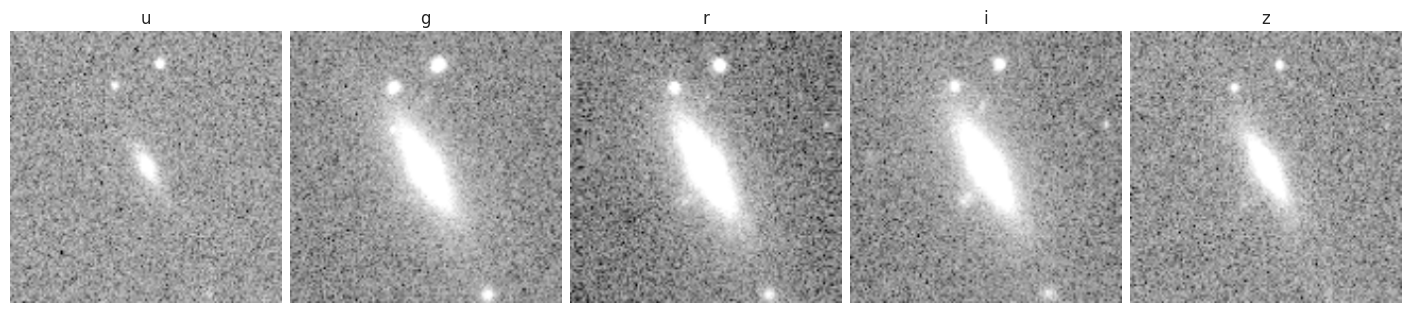

In [33]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
from astropy import units as u
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.visualization import ImageNormalize, ZScaleInterval, AsinhStretch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# ---- Input: target position ----
pos = coords.SkyCoord(ra = 230.89159883383, dec = -0.395925931377392, unit="deg")

# ---- Desired display geometry to match your gallery ----
# Your gallery uses scale=0.2 arcsec/pixel and 256x256 pixels:
target_fov_arcsec = 256 * 0.2  # 51.2"
target_size_pixels = 256       # final display size per panel

bands = ["u", "g", "r", "i", "z"]
cutouts_256 = {}  # band -> 256x256 array

for b in bands:
    # Pull a small image around the position; radius >= half the desired FOV
    radius = (target_fov_arcsec/2) * u.arcsec
    hdulist = SDSS.get_images(coordinates=pos, band=b, radius=radius.to(u.deg))[0]

    # Find the first HDU with data + its WCS
    data = None
    wcs = None
    for hdu in hdulist:
        if getattr(hdu, "data", None) is not None:
            data = np.nan_to_num(hdu.data, nan=0.0, posinf=0.0, neginf=0.0)
            try:
                wcs = WCS(hdu.header)
            except Exception:
                wcs = None
            break
    if data is None or wcs is None:
        print(f"[{b}] No image data or WCS found")
        continue

    # Make a cutout with the *same angular FOV* as your gallery (51.2″ square)
    # Cutout2D can take a Quantity size in angular units if WCS is provided
    size = (target_fov_arcsec * u.arcsec, target_fov_arcsec * u.arcsec)
    cut = Cutout2D(data, position=pos, size=size, wcs=wcs, mode="trim")

    # Rescale the cutout array to 256x256 to match your gallery tiles
    # (native SDSS pixel scale is ~0.396″/px, so the cutout will be ~129×129 px)
    arr = cut.data
    # Normalize for display (zscale + asinh)
    norm = ImageNormalize(arr, interval=ZScaleInterval(), stretch=AsinhStretch())
    arr_norm = norm(arr)

    # Convert to 8-bit image for clean resizing
    arr_8 = np.clip(arr_norm * 255, 0, 255).astype(np.uint8)
    im = Image.fromarray(arr_8)
    im_resized = im.resize((target_size_pixels, target_size_pixels), resample=Image.BILINEAR)

    cutouts_256[b] = np.array(im_resized)

# ---- Display side-by-side panels (u g r i z), each 256×256, same FOV as gallery ----
if cutouts_256:
    fig, axes = plt.subplots(1, len(cutouts_256), figsize=(14, 3), constrained_layout=True)
    for ax, b in zip(axes, bands):
        img = cutouts_256.get(b)
        ax.imshow(img, cmap="gray", origin="lower")
        ax.set_title(b)
        ax.axis("off")
    plt.show()
else:
    print("No cutouts produced.")


In [ ]:
W